In [14]:
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from os.path import join
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import concatenate
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [12]:
dataset_path = os.curdir
processed_dataset_path = join(os.curdir, "processed")
if not os.path.isdir(processed_dataset_path):
    os.mkdir(processed_dataset_path)

class_labels = ["call", "dislike", "fist", "like", "peace", "rock"]


In [4]:
X = np.loadtxt(join(processed_dataset_path, f"X.csv"),
               delimiter=",",
               dtype=float)
y = np.loadtxt(join(processed_dataset_path, f"y.csv"),
               delimiter=",",
               dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

y_train_OHE = to_categorical(y_train, num_classes=6)
y_test_OHE = to_categorical(y_test, num_classes=6)


In [6]:
def plot_loss_accuracy(history, title=None):
    # Create Subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    if title is not None:
        # Set Figure Title
        fig.suptitle(title,
                    fontsize=14,
                    y=1.05)
    # Set Figure facecolor to White
    fig.set_facecolor('white')

    # Plot error vs iteration graph
    ax[0].plot(history['loss'],
               color='tab:blue',
               linewidth=1.5,
               label="Train Loss")
    ax[0].plot(history['val_loss'],
               color='tab:orange',
               linewidth=1.5,
               label="Test Loss")
    # Set title for the subplot
    ax[0].set_title(f"Loss vs epoch", size=12, y=1.01)
    # Set labels for the x and y axis
    ax[0].set_xlabel('Epoch', size=10)
    ax[0].set_ylabel('Loss', size=10)
    # Show plot legends
    ax[0].legend()
    # Turn on grid
    ax[0].grid(linestyle='dashed')

    # Plot accuracy vs iteration graph
    ax[1].plot(history['accuracy'],
               color='tab:blue',
               linewidth=1.5,
               label="Train Accuracy")
    ax[1].plot(history['val_accuracy'],
               color='tab:orange',
               linewidth=1.5,
               label="Test Accuracy")
    # Set title for the subplot
    ax[1].set_title(f"Accuracy vs epoch", size=12, y=1.01)
    # Set labels for the x and y axis
    ax[1].set_xlabel('Epoch', size=10)
    ax[1].set_ylabel('Accuracy', size=10)
    # Show plot legends
    ax[1].legend()
    # Turn on grid
    ax[1].grid(linestyle='dashed')

    # Show plot
    plt.show()

# Classical ML

In [6]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

print(clf)

y_pred = clf.predict(X_train)
print("Train accuracy:", accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


LogisticRegression()
Train accuracy: 0.8766671079193832
Test accuracy: 0.8815606592097426


/home/rrjahin/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      5046
         1.0       0.83      0.91      0.87      4988
         2.0       0.97      0.91      0.94      5019
         3.0       0.81      0.80      0.80      4878
         4.0       0.96      0.91      0.93      5192
         5.0       0.92      0.91      0.91      5095

    accuracy                           0.88     30218
   macro avg       0.88      0.88      0.88     30218
weighted avg       0.88      0.88      0.88     30218



In [8]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)

print(clf)

y_pred = clf.predict(X_train)
print("Train accuracy:", accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


RandomForestClassifier(max_depth=15, random_state=0)
Train accuracy: 0.9711917132739848
Test accuracy: 0.8980739956317426


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      5046
         1.0       0.83      0.90      0.86      4988
         2.0       0.95      0.89      0.92      5019
         3.0       0.84      0.89      0.86      4878
         4.0       0.97      0.90      0.94      5192
         5.0       0.95      0.90      0.92      5095

    accuracy                           0.90     30218
   macro avg       0.90      0.90      0.90     30218
weighted avg       0.90      0.90      0.90     30218



# Vanilla DNN

Epoch 1/500


2022-12-04 11:03:55.808678: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-12-04 11:03:55.808704: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jahin-alienware
2022-12-04 11:03:55.808710: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jahin-alienware
2022-12-04 11:03:55.808772: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2022-12-04 11:03:55.808790: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.141.3
2022-12-04 11:03:55.808795: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 470.141.3 does not match DSO version 470.161.3 -- cannot find working devices in this configuration
2022-12-04 11:03:55.809273: I tensorflow/core/platform/cpu_feature_guard.cc:19

12087/12087 [==============================] - 14s 1ms/step - loss: 0.4620 - accuracy: 0.8336 - val_loss: 0.2718 - val_accuracy: 0.8914
Epoch 2/500
12087/12087 [==============================] - 14s 1ms/step - loss: 0.2883 - accuracy: 0.8869 - val_loss: 0.2970 - val_accuracy: 0.8809
Epoch 3/500
12087/12087 [==============================] - 14s 1ms/step - loss: 0.2663 - accuracy: 0.8944 - val_loss: 0.2251 - val_accuracy: 0.9081
Epoch 4/500
12087/12087 [==============================] - 14s 1ms/step - loss: 0.2536 - accuracy: 0.8990 - val_loss: 0.2392 - val_accuracy: 0.9025
Epoch 5/500
12087/12087 [==============================] - 14s 1ms/step - loss: 0.2459 - accuracy: 0.9011 - val_loss: 0.2181 - val_accuracy: 0.9101
Epoch 6/500
12087/12087 [==============================] - 14s 1ms/step - loss: 0.2400 - accuracy: 0.9034 - val_loss: 0.2677 - val_accuracy: 0.8944
Epoch 7/500
12087/12087 [==============================] - 15s 1ms/step - loss: 0.2360 - accuracy: 0.9039 - val_loss: 0.2119

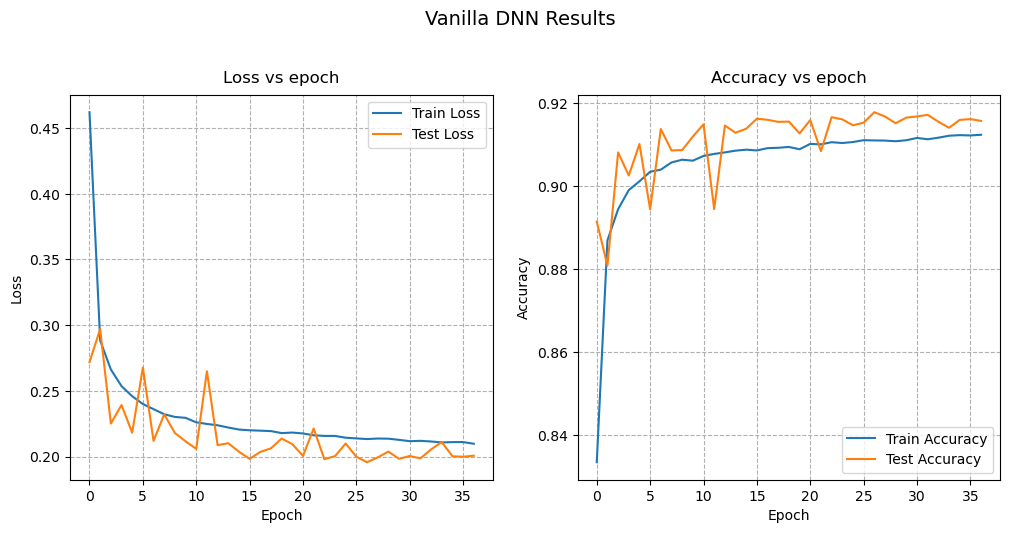

In [8]:
def DNN():
    model = Sequential()
    model.add(Dense(256, input_shape=(63,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    # model.add(Dense(256, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    
    return model

model = DNN()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_OHE,
                    validation_data=(X_test, y_test_OHE),
                    epochs=500, 
                    batch_size=10, 
                    verbose=1,
                    callbacks=[EarlyStopping(monitor='val_loss', 
                                             mode='min', 
                                             verbose=1,
                                             patience=10,
                                             restore_best_weights=True)])

plot_loss_accuracy(history.history, title="Vanilla DNN Results")


In [9]:
model.save('dnnModel.h5')

In [19]:
model = load_model('dnnModel.h5')
y_pred = model.predict(X_test)

945/945 [==============================] - 1s 570us/step


In [20]:
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      5046
         1.0       0.89      0.90      0.90      4988
         2.0       0.99      0.91      0.95      5019
         3.0       0.89      0.92      0.91      4878
         4.0       0.99      0.91      0.95      5192
         5.0       0.84      0.94      0.89      5095

    accuracy                           0.92     30218
   macro avg       0.92      0.92      0.92     30218
weighted avg       0.92      0.92      0.92     30218



# CNN

Epoch 1/500
12087/12087 [==============================] - 20s 2ms/step - loss: 0.4968 - accuracy: 0.8066 - val_loss: 0.2687 - val_accuracy: 0.8928
Epoch 2/500
12087/12087 [==============================] - 20s 2ms/step - loss: 0.3359 - accuracy: 0.8681 - val_loss: 0.2541 - val_accuracy: 0.8984
Epoch 3/500
12087/12087 [==============================] - 20s 2ms/step - loss: 0.3154 - accuracy: 0.8755 - val_loss: 0.2497 - val_accuracy: 0.8978
Epoch 4/500
12087/12087 [==============================] - 20s 2ms/step - loss: 0.3038 - accuracy: 0.8791 - val_loss: 0.2452 - val_accuracy: 0.9003
Epoch 5/500
12087/12087 [==============================] - 20s 2ms/step - loss: 0.2987 - accuracy: 0.8816 - val_loss: 0.2330 - val_accuracy: 0.9055
Epoch 6/500
12087/12087 [==============================] - 20s 2ms/step - loss: 0.2971 - accuracy: 0.8823 - val_loss: 0.2346 - val_accuracy: 0.9046
Epoch 7/500
12087/12087 [==============================] - 20s 2ms/step - loss: 0.2910 - accuracy: 0.8849 - val_

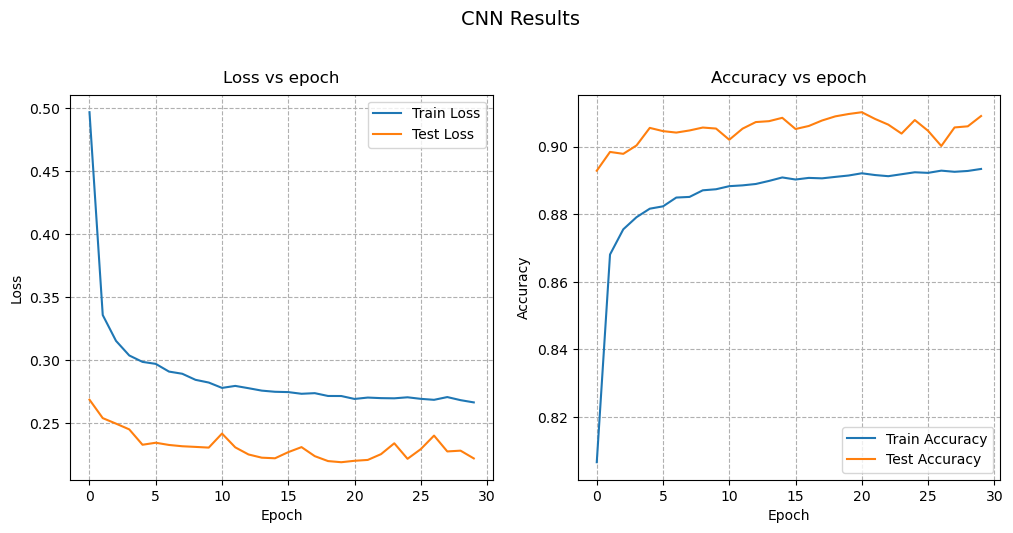

In [10]:
def CNN():
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(21, 3)))
    model.add(Dropout(0.5))
    model.add(Conv1D(32, 3, activation='relu'))
    model.add(Dropout(0.5))
    # model.add(Conv1D(64, 3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(6, activation='softmax'))

    return model


model = CNN()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train.reshape(-1, 21, 3), y_train_OHE,
                    validation_data=(X_test.reshape(-1, 21, 3), y_test_OHE),
                    epochs=500,
                    batch_size=10,
                    verbose=1,
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             mode='min',
                                             verbose=1,
                                             patience=10,
                                             restore_best_weights=True)])

plot_loss_accuracy(history.history, title="CNN Results")


In [11]:
model.save('cnnModel.h5')

In [18]:
model = load_model('cnnModel.h5')
y_pred = model.predict(X_test.reshape(-1, 21, 3))
print(classification_report(y_test, y_pred.argmax(axis=1)))

945/945 [==============================] - 1s 824us/step
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      5046
         1.0       0.71      0.97      0.82      4988
         2.0       1.00      0.91      0.95      5019
         3.0       0.94      0.88      0.91      4878
         4.0       0.99      0.91      0.95      5192
         5.0       1.00      0.89      0.94      5095

    accuracy                           0.91     30218
   macro avg       0.93      0.91      0.91     30218
weighted avg       0.93      0.91      0.91     30218

